# Importation des libraries et de la data :

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ici on va creer un dataframe qu'on appel dataset à partir de notre base de données excel

In [159]:
dataset = pd.read_excel('Dataset1.xlsx') 

In [160]:
dataset.head()

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit
0,Escale105,Vehicule1,Remorque1,Client1,2020-01-02,08:48,2020-01-02,06:58,43220,15760,14,14.0,TRTX DE SOJA
1,Escale106,Vehicule2,Remorque2,Client1,2020-01-02,08:47,2020-01-02,07:00,42460,16480,17,17.0,PULPE DE BETTRAVE
2,Escale106,Vehicule3,Remorque3,Client1,2020-01-02,11:17,2020-01-02,07:02,42940,16600,17,17.0,PULPE DE BETTRAVE
3,Escale105,Vehicule4,Remorque4,Client1,2020-01-02,08:46,2020-01-02,07:03,42560,14700,14,14.0,TRTX DE SOJA
4,Escale106,Vehicule5,Remorque5,Client1,2020-01-02,10:05,2020-01-02,07:03,42020,16300,17,17.0,PULPE DE BETTRAVE


# 1-Le poids à vide (chauffeur inclut) minimale observée :

In [150]:
dataset['Poids_vide'].min()

3760

l’analyse de la distribution des poids à vide :

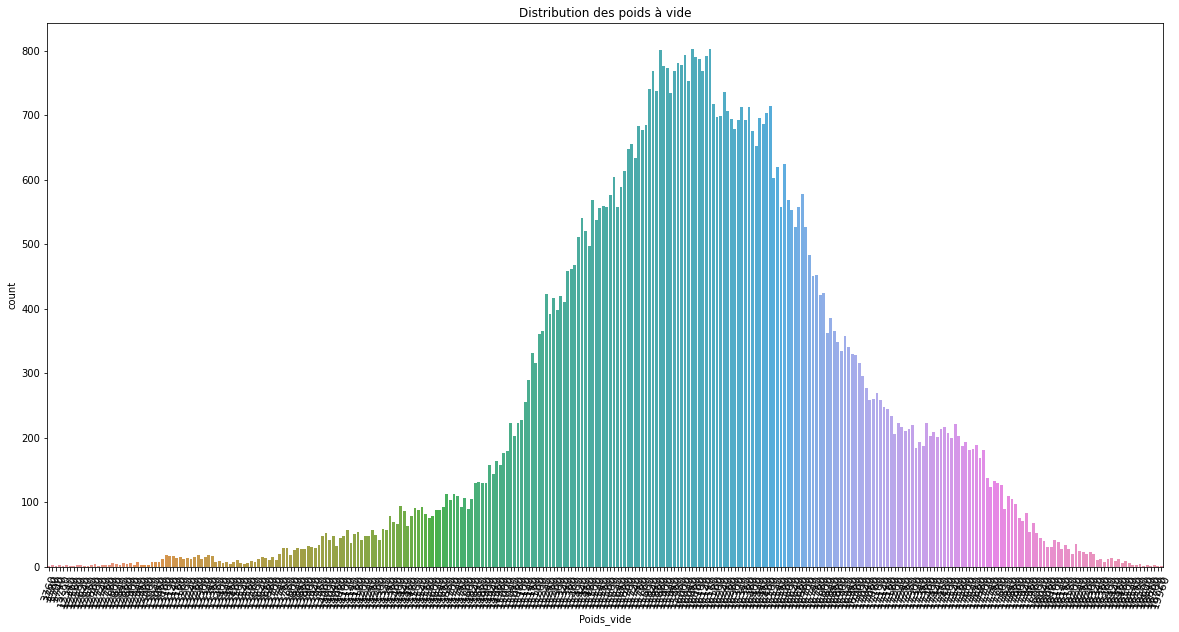

In [151]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(dataset['Poids_vide'])
plt.title('Distribution des poids à vide')
plt.xticks(rotation=70, fontsize=11);

La valeur moyenne :

In [152]:
dataset['Poids_vide'].mean()

16120.772422778966

# 2. Identifier l’écart type par couple véhicule / remorque :

In [153]:
dataset.std()

Poids_chargé    2127.778478
Poids_vide       833.697823
Pont_entrée        4.607585
pont_Sortie        4.697478
dtype: float64

# 5. Temps d’attente entre le poids à vide et poids totalement chargé à la sortie

In [154]:
#tout d'abord je vais convertir les châines de caractère heure en type heure pour calculer la diffirence 
dataset_copy = dataset
dataset_copy['Heure_entrée'] = pd.to_datetime(dataset_copy['Heure_entrée'],errors='coerce')
dataset_copy['Heure_sortie'] = pd.to_datetime(dataset_copy['Heure_sortie'],errors='coerce')

In [156]:
Temps_Attente = dataset_copy['Heure_entrée']-dataset_copy['Heure_sortie']

In [157]:
Temps_Attente.head(10)

0   01:50:00
1   01:47:00
2   04:15:00
3   01:43:00
4   03:02:00
5   03:18:00
6   02:22:00
7   02:00:00
8   02:21:00
9   02:34:00
dtype: timedelta64[ns]

On peut calculer aussi le temps d'attente moyen pour chaaque vehicule :

In [158]:
Temps_Attente.mean()

Timedelta('0 days 00:44:09.241031')

# 6. Analyse selon la destination

In [88]:
Nombr_Vehi_par_Client = dataset.groupby('Num_Client').count()['Num_Vehicule']

In [89]:
Nombr_Vehi_par_Client

Num_Client
Client1     24888
Client10     8781
Client11      112
Client12     3844
Client13       60
Client14     1690
Client15      564
Client16      527
Client17        1
Client18      748
Client19      516
Client2      9549
Client20     2425
Client21     2432
Client22      281
Client23      228
Client24        2
Client25        1
Client26       10
Client3      1237
Client4       212
Client5         5
Client6       818
Client7      1968
Client8      9706
Client9         4
Name: Num_Vehicule, dtype: int64

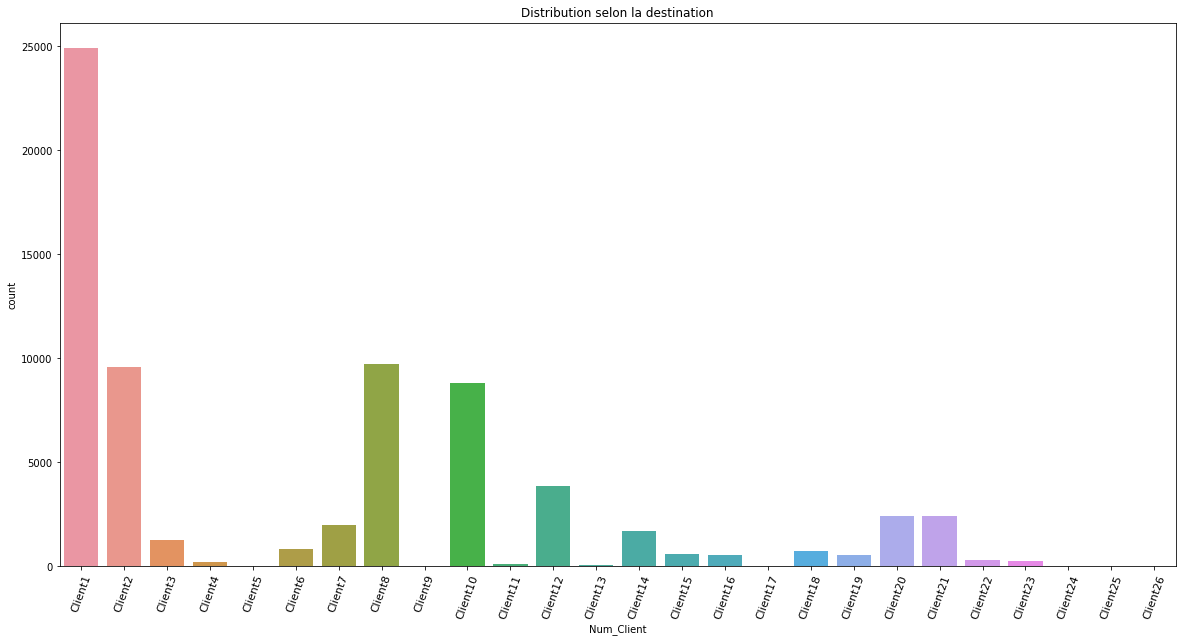

In [102]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(dataset['Num_Client'])
plt.title('Distribution selon la destination')
plt.xticks(rotation=70, fontsize=11);

# 7. Analyse selon la matière première

In [97]:
dataset.groupby('Produit').count()['Num_Vehicule'].sort_values()

Produit
25 TOLES EN ACIERS                                          1
nouveu bois usagee                                          1
pesage ferraille recuperation                               1
PESAGE DE BOIS DED RECUPERATION                             1
BOIS DE FARDAGE                                             1
RECUPERATION DE FARDAGE                                     1
trtx  soja   bulletin complement du prest 2020040224        2
RECUPERATION CORDAGE                                        2
SEL GEMME                                                   5
lot de frdx steel billets                                  10
TRTX TOURNESOL                                             25
S/BLE                                                      38
HUILE BRUTE DE SOJA                                        59
VRAC  D'ARGILE                                             60
hydroxyde d aluminium                                      75
ble dur                                                    76


In [100]:
dataset.groupby('Produit').count()['Num_Vehicule'].describe()

count       52.000000
mean      1357.865385
std       2578.460508
min          1.000000
25%         59.750000
50%        209.000000
75%       1126.750000
max      12837.000000
Name: Num_Vehicule, dtype: float64

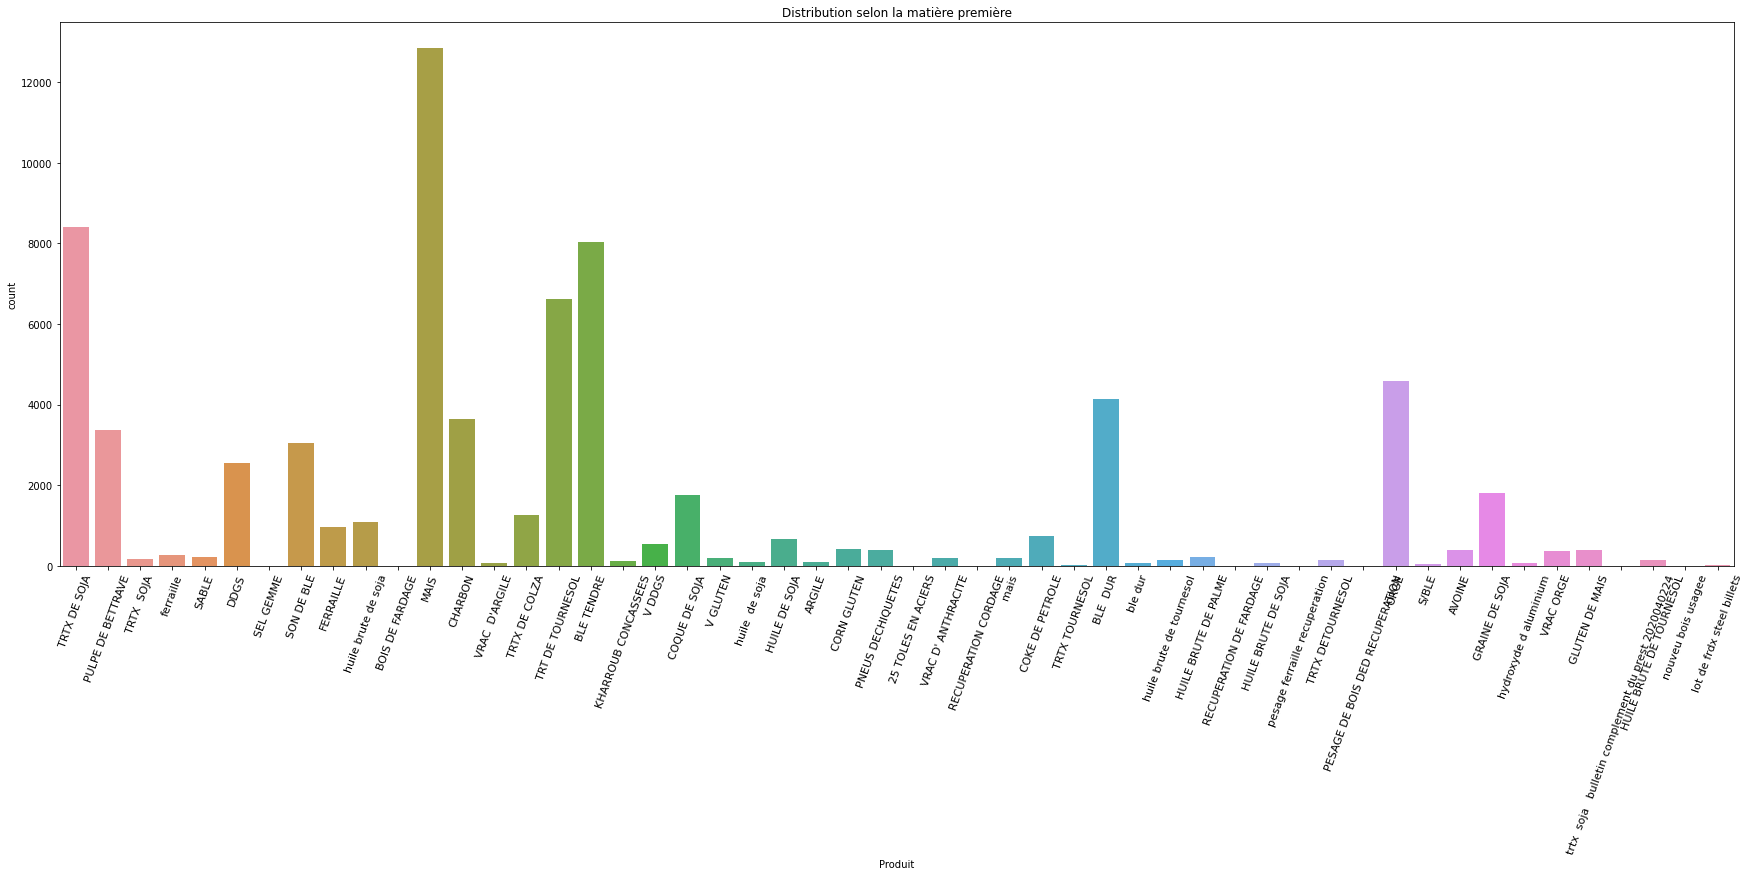

In [101]:
plt.figure(figsize=(30, 10))
plt.tight_layout()
sns.countplot(dataset['Produit'])
plt.title('Distribution selon la matière première')
plt.xticks(rotation=70, fontsize=11);

# 8. Pesage chez différent pont bascule : 

Les camions entrée et sortie par le même pont :

In [161]:
dataset[dataset['pont_Sortie']==dataset['Pont_entrée']]

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit
0,Escale105,Vehicule1,Remorque1,Client1,2020-01-02,08:48,2020-01-02,06:58,43220,15760,14,14.0,TRTX DE SOJA
1,Escale106,Vehicule2,Remorque2,Client1,2020-01-02,08:47,2020-01-02,07:00,42460,16480,17,17.0,PULPE DE BETTRAVE
2,Escale106,Vehicule3,Remorque3,Client1,2020-01-02,11:17,2020-01-02,07:02,42940,16600,17,17.0,PULPE DE BETTRAVE
3,Escale105,Vehicule4,Remorque4,Client1,2020-01-02,08:46,2020-01-02,07:03,42560,14700,14,14.0,TRTX DE SOJA
4,Escale106,Vehicule5,Remorque5,Client1,2020-01-02,10:05,2020-01-02,07:03,42020,16300,17,17.0,PULPE DE BETTRAVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70598,Escale25,Vehicule1863,Remorque2750,Client2,2020-06-09,12:56,2020-06-09,11:33,41660,16560,7,7.0,DDGS
70601,Escale27,Vehicule397,Remorque420,Client1,2020-06-09,13:01,2020-06-09,11:42,42600,16040,19,19.0,TRT DE TOURNESOL
70603,Escale64,Vehicule997,Remorque1271,Client14,2020-06-09,13:11,2020-06-09,11:54,42680,15300,14,14.0,BLE TENDRE
70604,Escale27,Vehicule426,Remorque449,Client1,2020-06-09,13:07,2020-06-09,12:05,41400,15580,19,19.0,TRT DE TOURNESOL


Et les camions entrée par un pont bascule et sortie par un autre :

In [162]:
dataset[dataset['pont_Sortie']!=dataset['Pont_entrée']]

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit
19,Escale84,Vehicule20,Remorque20,Client2,2020-01-02,10:01,2020-01-02,07:22,42440,15500,7,19.0,TRTX SOJA
21,Escale84,Vehicule22,Remorque22,Client2,2020-01-02,10:13,2020-01-02,07:23,41520,17580,7,19.0,TRTX SOJA
24,Escale9,Vehicule25,Remorque25,Client3,2020-01-02,08:42,2020-01-02,07:26,31380,16480,19,7.0,ferraille
28,Escale105,Vehicule29,Remorque29,Client1,2020-01-02,09:12,2020-01-02,07:27,43580,16700,14,7.0,TRTX DE SOJA
31,Escale9,Vehicule32,Remorque32,Client3,2020-01-02,08:45,2020-01-02,07:29,30600,16640,19,7.0,ferraille
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70600,Escale64,Vehicule2130,Remorque3352,Client14,2020-06-09,13:05,2020-06-09,11:42,43480,16940,14,7.0,BLE TENDRE
70602,Escale64,Vehicule1653,Remorque2305,Client14,2020-06-09,13:07,2020-06-09,11:54,43720,16300,14,7.0,BLE TENDRE
70605,Escale25,Vehicule61,Remorque61,Client2,2020-06-09,12:58,2020-06-09,12:07,42580,17380,7,14.0,DDGS
70606,Escale25,Vehicule2474,Remorque4137,Client2,2020-06-09,13:09,2020-06-09,12:08,42320,17780,7,14.0,DDGS


Le camions entrée et sortie par des ponts differents regrouper par les ponts d'entrées :

In [163]:
dataset[dataset['pont_Sortie']!=dataset['Pont_entrée']].groupby('Pont_entrée').count()['Num_Vehicule']

Pont_entrée
7     6307
10     212
14    7435
17     122
18    4587
19    5205
Name: Num_Vehicule, dtype: int64

In [121]:
dataset[dataset['pont_Sortie']!=dataset['Pont_entrée']].groupby('pont_Sortie').count()['Num_Vehicule']

pont_Sortie
7.0     8715
10.0      22
14.0    6826
17.0      30
18.0    3426
19.0    4843
Name: Num_Vehicule, dtype: int64

les camions entrée par le pont 7 et sortie par le pont 19 :

In [164]:
dataset[(dataset['pont_Sortie']==19)&(dataset['Pont_entrée']==7)]

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit
19,Escale84,Vehicule20,Remorque20,Client2,2020-01-02,10:01,2020-01-02,07:22,42440,15500,7,19.0,TRTX SOJA
21,Escale84,Vehicule22,Remorque22,Client2,2020-01-02,10:13,2020-01-02,07:23,41520,17580,7,19.0,TRTX SOJA
33,Escale84,Vehicule34,Remorque34,Client2,2020-01-02,10:14,2020-01-02,07:29,41800,17580,7,19.0,TRTX SOJA
41,Escale84,Vehicule42,Remorque42,Client2,2020-01-02,10:23,2020-01-02,07:31,42800,17440,7,19.0,TRTX SOJA
44,Escale84,Vehicule45,Remorque45,Client2,2020-01-02,10:53,2020-01-02,07:32,43960,17560,7,19.0,TRTX SOJA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70531,Escale25,Vehicule349,Remorque368,Client1,2020-06-09,10:29,2020-06-09,09:20,38520,15140,7,19.0,DDGS
70559,Escale25,Vehicule277,Remorque290,Client1,2020-06-09,10:59,2020-06-09,10:09,40700,16520,7,19.0,DDGS
70581,Escale25,Vehicule1036,Remorque1359,Client1,2020-06-09,12:51,2020-06-09,10:54,40260,15200,7,19.0,DDGS
70588,Escale25,Vehicule681,Remorque778,Client1,2020-06-09,13:01,2020-06-09,11:06,40280,16620,7,19.0,DDGS


# 9. Analyse de saisonnalité : 

Période avant Covid (avant le 16 mars) :

In [165]:
dataset[dataset['Date_entrée']<'2020-03-16']

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit
0,Escale105,Vehicule1,Remorque1,Client1,2020-01-02,08:48,2020-01-02,06:58,43220,15760,14,14.0,TRTX DE SOJA
1,Escale106,Vehicule2,Remorque2,Client1,2020-01-02,08:47,2020-01-02,07:00,42460,16480,17,17.0,PULPE DE BETTRAVE
2,Escale106,Vehicule3,Remorque3,Client1,2020-01-02,11:17,2020-01-02,07:02,42940,16600,17,17.0,PULPE DE BETTRAVE
3,Escale105,Vehicule4,Remorque4,Client1,2020-01-02,08:46,2020-01-02,07:03,42560,14700,14,14.0,TRTX DE SOJA
4,Escale106,Vehicule5,Remorque5,Client1,2020-01-02,10:05,2020-01-02,07:03,42020,16300,17,17.0,PULPE DE BETTRAVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23539,Escale93,Vehicule1689,Remorque833,Client7,2020-03-15,21:32,2020-03-15,12:22,42060,15780,19,19.0,huile brute de tournesol
23540,Escale93,Vehicule715,Remorque816,Client7,2020-03-15,21:38,2020-03-15,12:25,43140,16780,19,19.0,huile brute de tournesol
23541,Escale93,Vehicule710,Remorque811,Client7,2020-03-15,21:50,2020-03-15,12:27,42480,15160,19,19.0,huile brute de tournesol
23542,Escale93,Vehicule720,Remorque820,Client7,2020-03-15,22:03,2020-03-15,15:18,41980,14860,19,19.0,huile brute de tournesol


Et pendant le Covid-19 :

In [166]:
dataset[dataset['Date_entrée']>='2020-03-16']

,Num_escale,Num_Vehicule,Num_REMORQUE,Num_Client,Date_entrée,Heure_entrée,Date_sortie,Heure_sortie,Poids_chargé,Poids_vide,Pont_entrée,pont_Sortie,Produit
23544,Escale86,Vehicule579,Remorque648,Client19,2020-03-16,08:27,2020-03-16,07:10,40880,16400,19,14.0,PULPE DE BETTRAVE
23545,Escale86,Vehicule204,Remorque207,Client8,2020-03-16,08:39,2020-03-16,07:13,41540,16500,19,19.0,PULPE DE BETTRAVE
23546,Escale86,Vehicule346,Remorque365,Client8,2020-03-16,09:37,2020-03-16,07:13,43620,17560,19,14.0,PULPE DE BETTRAVE
23547,Escale93,Vehicule746,Remorque851,Client7,2020-03-16,08:01,2020-03-16,07:15,43220,15360,19,19.0,huile brute de tournesol
23548,Escale86,Vehicule881,Remorque1063,Client8,2020-03-16,09:14,2020-03-16,07:15,43060,17480,19,14.0,PULPE DE BETTRAVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70604,Escale27,Vehicule426,Remorque449,Client1,2020-06-09,13:07,2020-06-09,12:05,41400,15580,19,19.0,TRT DE TOURNESOL
70605,Escale25,Vehicule61,Remorque61,Client2,2020-06-09,12:58,2020-06-09,12:07,42580,17380,7,14.0,DDGS
70606,Escale25,Vehicule2474,Remorque4137,Client2,2020-06-09,13:09,2020-06-09,12:08,42320,17780,7,14.0,DDGS
70607,Escale25,Vehicule59,Remorque59,Client2,2020-06-09,13:17,2020-06-09,12:21,42640,17860,7,7.0,DDGS
